In [2]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
import matplotlib.pyplot as plt

2.3.0


11493376/11490434 [==============================] - 0s 0us/step


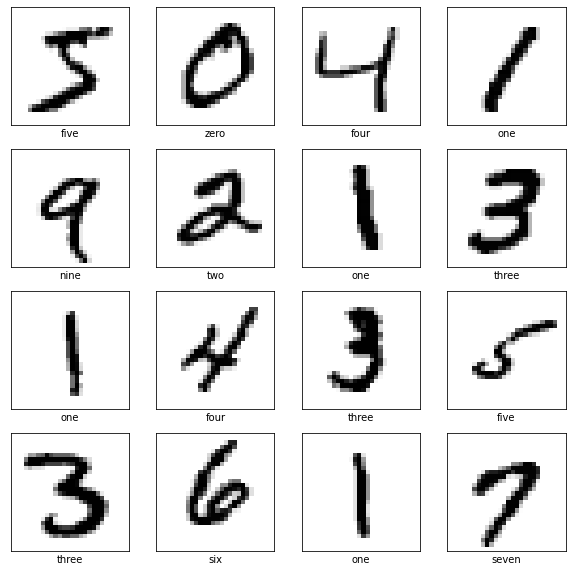

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [4]:
from keras.layers.convolutional import Conv2D, AveragePooling2D
IMG_SIZE = (28, 28, 1)
model = Sequential()
model.add(Input(shape=IMG_SIZE))
model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [5]:
train_images = train_images.reshape(60000, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(10000, 28, 28, 1).astype('float32') / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10) 

logdir = './logs/func-mnistLeNet'
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
model.fit(train_images, train_labels, epochs=10, 
          validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])

Epoch 1/10
   1/1875 [..............................] - ETA: 1s - loss: 2.2989 - accuracy: 0.1875WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2204 - accuracy: 0.9351 - val_loss: 0.0821 - val_accuracy: 0.9742
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0768 - accuracy: 0.9766 - val_loss: 0.0519 - val_accuracy: 0.9829
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0553 - accuracy: 0.9829 - val_loss: 0.0405 - val_accuracy: 0.9869
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0427 - accuracy: 0.9865 - val_loss: 0.0447 - val_accuracy: 0.9855
Epoch 5/10
1875/1875 [==============================] - 6s 3

In [ ]:
%load_ext tensorboard
%tensorboard --logdir ./logs/func-mnistLeNet
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy = {0:.2f}%'.format(test_accuracy*100.0))

Launching TensorBoard...